<a href="https://colab.research.google.com/github/desstaw/Seminar_DataManagement23/blob/main/Generalization_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import random


# Load data
url = "https://raw.githubusercontent.com/desstaw/Seminar_DataManagement23/main/datasets/heart.csv"
df = pd.read_csv(url)
df = df.drop('Unnamed: 0', axis=1)
df.columns


import warnings
warnings.simplefilter('ignore')

In [ ]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Hand-crafted Anonymization

(53.0, 58.0]    247
(58.0, 63.0]    183
(39.0, 44.0]    131
(49.0, 53.0]    129
(63.0, 68.0]    129
(44.0, 49.0]    106
(34.0, 39.0]     47
(68.0, 73.0]     34
(73.0, 77.0]      9
(29.0, 34.0]      6
Name: age_range, dtype: int64


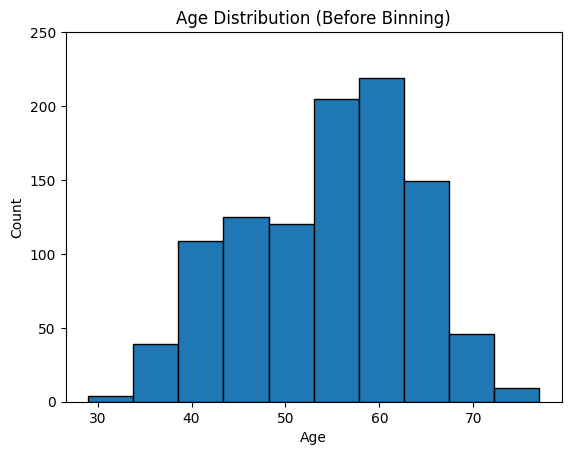

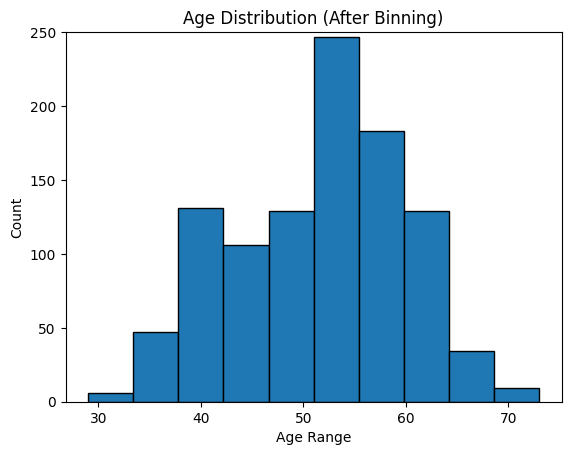

In [ ]:
# Calculate bin edges using np.ceil()
bin_edges = np.ceil(np.linspace(df['age'].min(), df['age'].max(), 11))

# Bin the data using pd.cut()
df['age_range'] = pd.cut(df['age'], bins=bin_edges)

# Convert age_range column to a list of floats
ages = df['age_range'].apply(lambda x: x.left).tolist()


# Print the bins and the count of values in each bin
print(df['age_range'].value_counts())

# Create histogram of original data
plt.hist(df['age'], bins=10, edgecolor='black')
plt.ylim([0, 250])
plt.title('Age Distribution (Before Binning)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Calculate bin edges using np.ceil()
bin_edges = np.ceil(np.linspace(df['age'].min(), df['age'].max(), 11))

# Bin the data using pd.cut()
df['age_range'] = pd.cut(df['age'], bins=bin_edges)

# Convert interval objects to left edges
left_edges = df['age_range'].apply(lambda x: x.left)

# Create histogram of binned data
plt.hist(left_edges, bins=10, edgecolor='black')
plt.ylim([0, 250])
plt.title('Age Distribution (After Binning)')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.show()

(214.0, 258.0]    363
(170.0, 214.0]    253
(258.0, 302.0]    227
(302.0, 345.0]    114
(126.0, 170.0]     39
(389.0, 433.0]     13
(345.0, 389.0]     10
(521.0, 564.0]      3
(433.0, 477.0]      0
(477.0, 521.0]      0
Name: chol_range, dtype: int64


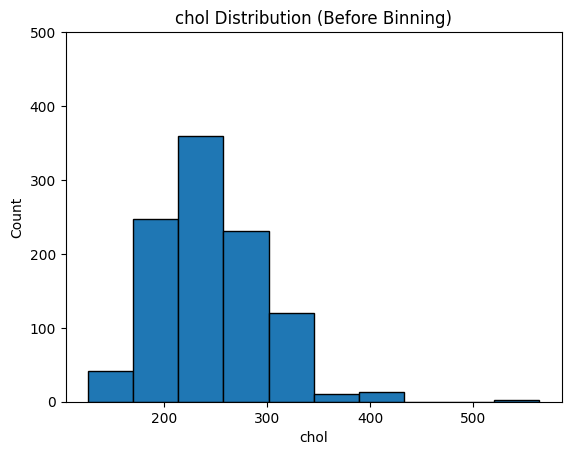

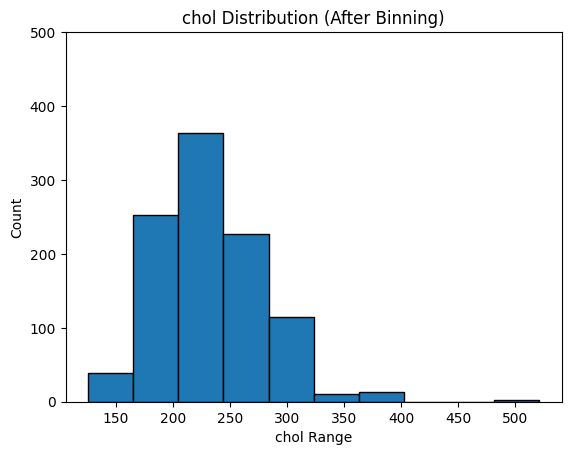

In [ ]:
# Calculate bin edges using np.ceil()
bin_edges = np.ceil(np.linspace(df['chol'].min(), df['chol'].max(), 11))

# Bin the data using pd.cut()
df['chol_range'] = pd.cut(df['chol'], bins=bin_edges)

# Convert interval objects to left edges
left_edges = df['chol_range'].apply(lambda x: x.left)

# Print the bins and the count of values in each bin
print(df['chol_range'].value_counts())

# Create histogram of original data
plt.hist(df['chol'], bins=10, edgecolor='black')
plt.ylim([0, 500])
plt.title('chol Distribution (Before Binning)')
plt.xlabel('chol')
plt.ylabel('Count')
plt.show()

# Create histogram of binned data
plt.hist(left_edges, bins=10, edgecolor='black')
plt.ylim([0, 500])
plt.title('chol Distribution (After Binning)')
plt.xlabel('chol Range')
plt.ylabel('Count')
plt.show()


(-0.001, 1.0]    599
(1.0, 2.0]       248
(2.0, 3.0]       105
(3.0, 4.0]        56
(4.0, 7.0]        17
Name: oldpeak_range, dtype: int64


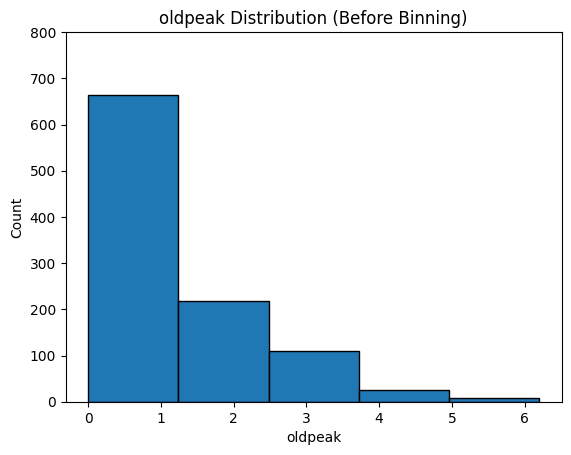

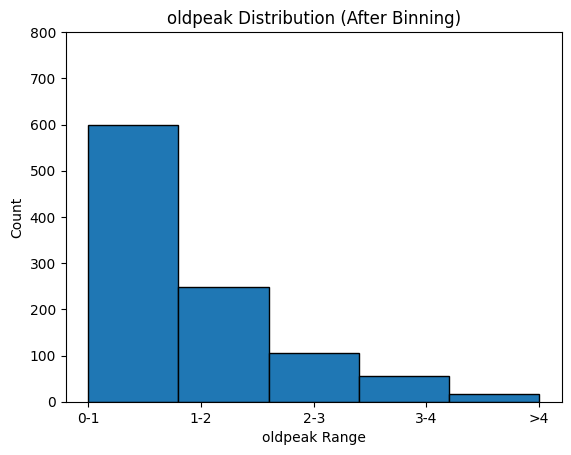

In [ ]:
# Define bin edges
bin_edges = [0, 1, 2, 3, 4, 7]

# Bin the data using pd.cut()
df['oldpeak_range'] = pd.cut(df['oldpeak'], bins=bin_edges, include_lowest=True)

# Convert interval objects to left edges
left_edges = df['oldpeak_range'].apply(lambda x: x.left)

# Print the bins and the count of values in each bin
print(df['oldpeak_range'].value_counts())

# Create histogram of original data
plt.hist(df['oldpeak'], bins=5, edgecolor='black')
plt.ylim([0, 800])
plt.title('oldpeak Distribution (Before Binning)')
plt.xlabel('oldpeak')
plt.ylabel('Count')
plt.show()

# Create histogram of binned data
plt.hist(left_edges, bins=5, edgecolor='black')
plt.ylim([0, 800])
plt.title('oldpeak Distribution (After Binning)')
plt.xlabel('oldpeak Range')
plt.xticks(bin_edges[:-1], labels=['0-1', '1-2', '2-3', '3-4', '>4'])

plt.ylabel('Count')
plt.show()


In [ ]:
# Round the trestbps and thalach columns to the nearest 5
df["trestbps"] = round(df["trestbps"] / 5) * 5
df["thalach"] = round(df["thalach"] / 5) * 5

In [ ]:
# Define a function to anonymize the thal and ca column
def generalize(value):
    if value == 0:
        return random.choice(["[0,1]", "[1,2]"])
    elif value == 1:
        return "[1,2]"
    elif value == 2:
        return random.choice(["[1,2]", "[2,3]"])
    elif value == 3:
        return "[2,3]"

# Apply the generalize function to the thal and ca columns
df["thal"] = df["thal"].apply(generalize)
df["ca"] = df["ca"].apply(generalize)

# Convert the columns to categorical data type
df["thal"] = df["thal"].astype("category")
df["ca"] = df["ca"].astype("category")

In [ ]:
# Drop "age", "chol", and "oldpeak" columns
df = df.drop(["age", "chol", "oldpeak"], axis=1)

# Move the "target" column to the last position
cols = df.columns.tolist()
cols.remove("target")
cols.append("target")
df = df.reindex(columns=cols)

In [ ]:
df.head()

,sex,cp,trestbps,fbs,restecg,thalach,exang,slope,ca,thal,age_range,chol_range,oldpeak_range,target
0,1,0,125.0,0,1,170.0,0,2,"[1,2]","[2,3]","(49.0, 53.0]","(170.0, 214.0]","(-0.001, 1.0]",0
1,1,0,140.0,1,0,155.0,1,0,"[0,1]","[2,3]","(49.0, 53.0]","(170.0, 214.0]","(3.0, 4.0]",0
2,1,0,145.0,0,1,125.0,1,0,"[1,2]","[2,3]","(68.0, 73.0]","(170.0, 214.0]","(2.0, 3.0]",0
3,1,0,150.0,0,1,160.0,0,2,"[1,2]","[2,3]","(58.0, 63.0]","(170.0, 214.0]","(-0.001, 1.0]",0
4,0,0,140.0,1,1,105.0,0,1,"[2,3]","[2,3]","(58.0, 63.0]","(258.0, 302.0]","(1.0, 2.0]",0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   sex            1025 non-null   int64   
 1   cp             1025 non-null   int64   
 2   trestbps       1025 non-null   float64 
 3   fbs            1025 non-null   int64   
 4   restecg        1025 non-null   int64   
 5   thalach        1025 non-null   float64 
 6   exang          1025 non-null   int64   
 7   slope          1025 non-null   int64   
 8   ca             1007 non-null   category
 9   thal           1025 non-null   category
 10  age_range      1021 non-null   category
 11  chol_range     1022 non-null   category
 12  oldpeak_range  1025 non-null   category
 13  target         1025 non-null   int64   
dtypes: category(5), float64(2), int64(7)
memory usage: 78.6 KB


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#df.to_csv('/content/drive/MyDrive/Colab Notebooks/Sepsis/anonymized_heart.csv', index=False)
